
# Multiple Linear Regression with scikit-learn

This notebook builds on the previous **Multiple Linear Regression using Linear Algebra** notebook.  
Here, we use **scikit-learn** to implement the same concept in a more scalable and practical way — especially useful when your dataset contains many features.

We'll also introduce **interaction variables**, **cross-validation**, and use **statsmodels** to evaluate statistical significance (p-values) for each variable, similar to R.


In [16]:

#%%
import pandas as pd
import numpy as np
df = pd.read_csv('data/Student_Performance.csv')
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



## Step 1: Add Interaction Variables

These interaction terms multiply two features to capture their combined effect on the target.

We add interaction variables when we suspect that the effect of one feature on the outcome may depend on the value of another feature. For example, the impact of "Hours Studied" on performance might be different for students who get more sleep. By including these terms, the model can capture relationships that are not simply additive, allowing for more nuanced predictions.


In [17]:

#%% Add some INTERACTION variables
df['Previous Scores x Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'] * df['Previous Scores']
df['Hours Studied x Sleep Hours'] = df['Hours Studied'] * df['Sleep Hours']


In [18]:
# Drop categorical and target variables to focus on numeric features only.
# Then, analyze multicollinearity among features using a correlation matrix.
features = df.drop(columns=['Extracurricular Activities', 'Performance Index'])
features.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Previous Scores x Sample Question Papers Practiced,Hours Studied x Sleep Hours
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.012290,0.872131
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.368622,-0.011105
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.003158,0.435322
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.904609,0.014723
Previous Scores x Sample Question Papers Practiced,0.012290,0.368622,0.003158,0.904609,1.000000,0.009553
Hours Studied x Sleep Hours,0.872131,-0.011105,0.435322,0.014723,0.009553,1.000000



## Step 2: Encode Categorical Variable and Finalize Feature Matrix

Convert 'Yes'/'No' in `Extracurricular Activities` to 1/0 so that our model can use it for regression. Then define input matrix `x` and target `y`.


In [19]:

# %% With ECs
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0}) # no .str to map
x = df.drop(columns='Performance Index')
y = df[['Performance Index']]
x.head()


C:\Users\gamin\AppData\Local\Temp\ipykernel_29380\3217696824.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0}) # no .str to map


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Previous Scores x Sample Question Papers Practiced,Hours Studied x Sleep Hours
0,7,99,1,9,1,99,63
1,4,82,0,4,2,164,16
2,8,51,1,7,2,102,56
3,5,52,1,5,2,104,25
4,7,75,0,8,5,375,56



## Step 3: Split Testing and Training Sets

We randomly split the dataset using `train_test_split`.


In [20]:

# %% Split Testing and Training
from sklearn import model_selection

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size = .25, random_state=11)
xTrain.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Previous Scores x Sample Question Papers Practiced,Hours Studied x Sleep Hours
2262,4,77,1,6,2,154,24
1454,4,82,0,8,2,164,32
3901,4,80,0,8,0,0,32
6246,6,42,0,5,0,0,30
1331,9,77,1,9,6,462,81



## Step 4: Train the Model

Train a linear regression model and inspect coefficients.


In [21]:

# %% Make Model
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)

b0 = model.intercept_
b1 = model.coef_ # Because there are multiple features, this is a matrix
print(b1)
print('The interaction vars were basically zero, so they dont add value')


[[2.82447847e+00 1.01700543e+00 6.08514587e-01 4.58736669e-01
  1.82138704e-01 1.55639987e-04 4.34551329e-03]]
The interaction vars were basically zero, so they dont add value



## Step 5: Evaluate Model Performance

Use R² score to evaluate how well the model explains variance in the target variable.


In [22]:

# %% Get Baseline Metrics
from sklearn import metrics

yPred = model.predict(xTest)
r2 = metrics.r2_score(yTest, yPred)
r2


0.9892472522108712


## Step 6: Cross-Validation

A single train/test split can give misleading results if the split is not representative. Cross-validation splits the data into multiple folds, and averages performance across several splits, making the evaluation less sensitive to how the data is divided and providing a better measure of how the model will generalize to new data.

We use cross-validation to compare models, evaluate feature sets, and ensure generalization.  
This should ideally be done before final training on the full dataset.


In [23]:

# Basic Cross Val 
cvScore = model_selection.cross_val_score(model, x, y, cv = 5) # cv equal to number of splits
cvScore.mean() # Average of the 5 folds


np.float64(0.9887298603956483)

### Use a KFold Object

While `cross_val_score` can accept an integer for the number of folds, creating a `KFold` object gives you more control over the cross-validation process. With a `KFold` object, you can:

- **Shuffle the data** before splitting, which helps avoid bias if the data is ordered.
- **Set a random state** for reproducibility.
- **Customize splitting behavior** (e.g., stratified splits, group splits).

This flexibility is especially useful for ensuring fair and consistent evaluation, particularly with non-random or imbalanced datasets.

In [24]:

kf = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 11)
cvScore = model_selection.cross_val_score(model, x, y, cv = kf)
cvScore.mean()


np.float64(0.9887253312382163)


## Step 7: Visualize Actual vs Predicted

A red dashed line indicates the ideal case where predicted values match actual ones.


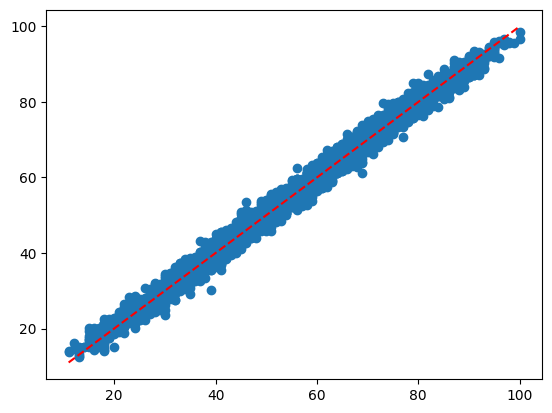

In [25]:

# %% Visualize
import matplotlib.pyplot as plt
y_equation = b0 + xTest @ b1.T
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--')  # Ideal line
plt.scatter(yTest, yPred)
plt.show()



## Step 8: OLS Summary with Statsmodels

Statsmodels gives us R-like output including p-values, standard errors, and confidence intervals.


In [26]:

# %% Statsmodel OLS to get R like output for p vals
import statsmodels.api as sm

xsm = sm.add_constant(xTrain) # Add column of 1s for the intercept
modelsm = sm.OLS(yTrain, xsm) # y and x swapped for some reason
results = modelsm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.265e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:41:01   Log-Likelihood:                -15987.
No. Observations:                7500   AIC:                         3.199e+04
Df Residuals:                    7492   BIC:                         3.204e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                -33.8194      0.272   -124.172      0.000     -34.353     -33.286
Hours Studied                                          2.8245      0.037     77.134      0.000       2.753       2.896
Previous Scores                                        1.0170      0.003    393.562      0.000       1.012       1.022
Extracurricular Activities                             0.6085      0.047     12.907      0.000       0.516       0.701
Sleep Hours                                            0.4587      0.030     15.086      0.000       0.399       0.518
Sample Question Papers Practiced                       0.1821      0.034      5.364      0.000       0.116       0.249
Previous Scores x Sample Question Papers Practiced     0.0002      0.000      0.328      0.743      -0.001       0.001
Hours Studied x Sleep Hours                            0.0043      0.005      0.805      0.421      -0.006       0.015
==============================================================================
Omnibus:                        3.283   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.339
Skew:                           0.028   Prob(JB):                        0.188
Kurtosis:                       3.087   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""